В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Задание
<ol>
<li>Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.</li>
<li>Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.</li>
<li>Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.</li>
<li>Проанализируйте CTR с разбивкой по рекламной кампании.</li>
<li>Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. </li>
<li>Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. </li>
<li>Посчитайте конверсию из клика в покупку.</li>
</ol>
    
#### Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
# Import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(
     font_scale=2,
     style="whitegrid",
     rc={'figure.figsize':(20,7)}
         )

In [3]:
df = pd.read_csv('conversion.csv')
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# Let's see how many unique advertising campaigns were carried out.
df['xyz_campaign_id'].nunique()

3

<AxesSubplot:>

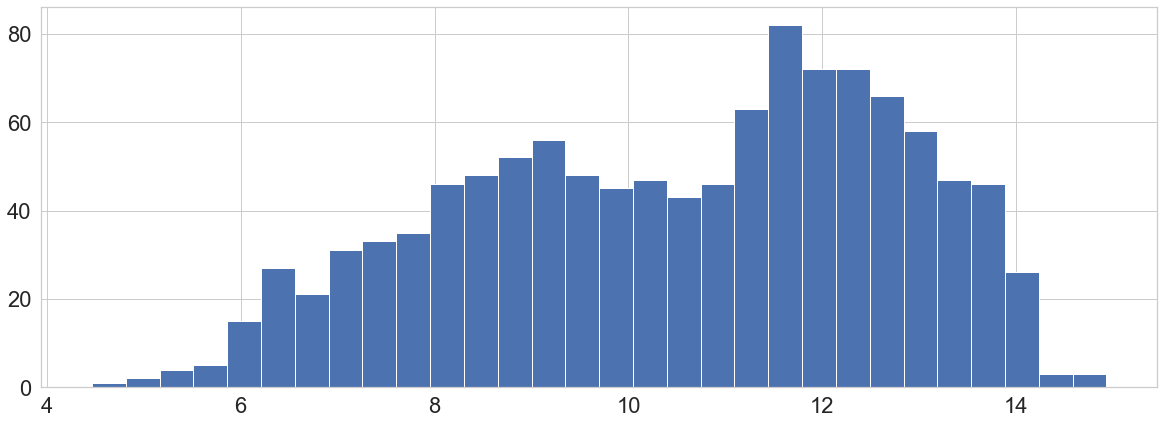

In [6]:
# Let's build a graph of the distribution of the number of impressions
# (Impressions - how many times users saw this ad) for each advertising campaign on Facebook,
# taking the logarithm of the values.
np.log(df['Impressions']).hist(bins=30)

In [7]:
# Now let's count some more useful metrics. The first is CTR (click-through rate),
# which shows click-through rate, i.e. ratio of clicks to impressions.
# Let's create a new column, then look at the descriptive statistics.
df['ctr'] = df['Clicks'] / df['Impressions']
df['ctr'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [8]:
df.iloc[df['ctr'].idxmax()].ad_id

738637

<AxesSubplot:>

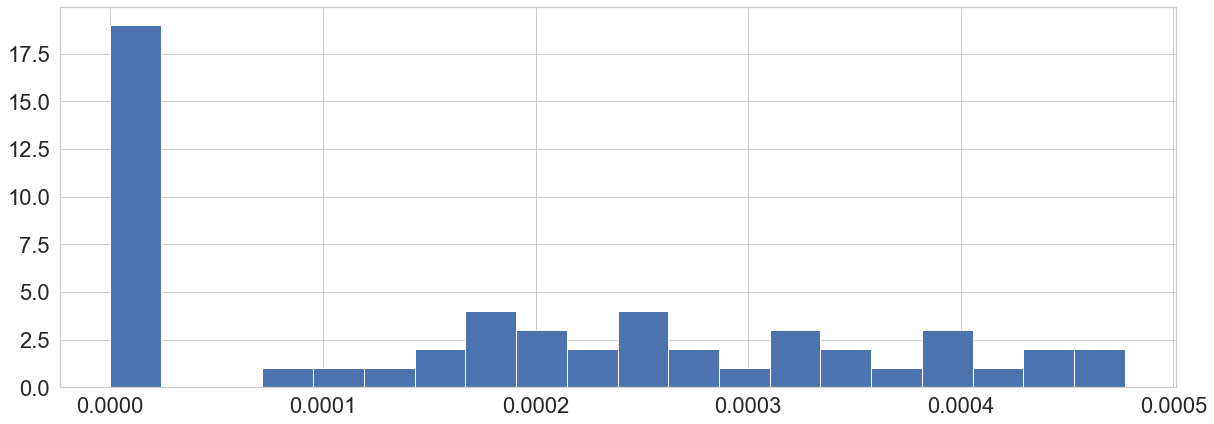

In [9]:
# Let's visualize the CTR broken down by the number of the advertising campaign (xyz_campaign_id).
df.query('xyz_campaign_id == 916')['ctr'].hist(bins=20)

In [10]:
# CPC (cost-per-click) - the cost per user click on an ad.
# Calculated by dividing the amount of money spent by the total number of clicks.
# Let's calculate and derive descriptive statistics for the new variable,
# look at the shape of the distribution.
df['cpc'] = df['Spent'] / df['Clicks']
df['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

<AxesSubplot:>

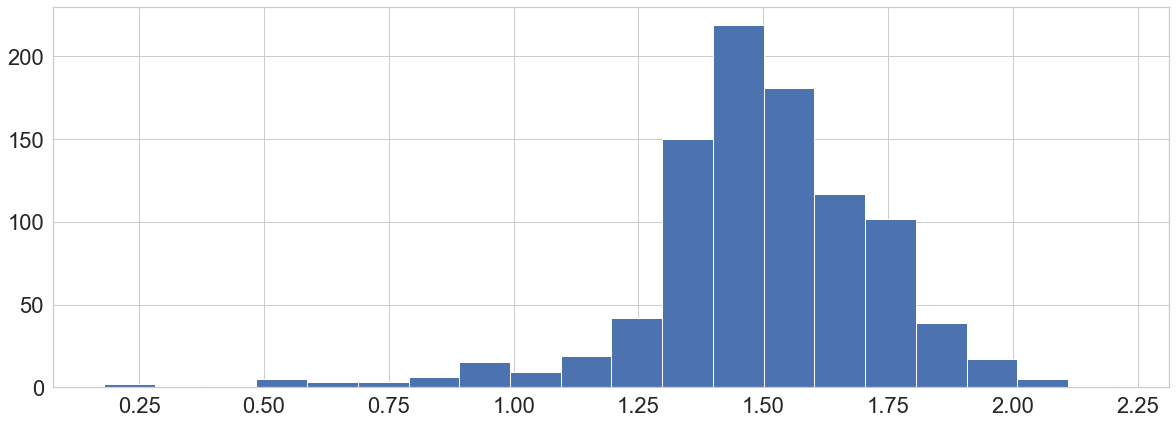

In [11]:
df['cpc'].hist(bins=20)

In [12]:
round(df['cpc'].quantile(0.75) - df['cpc'].quantile(0.25), 2)

0.25

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cpc', ylabel='Density'>

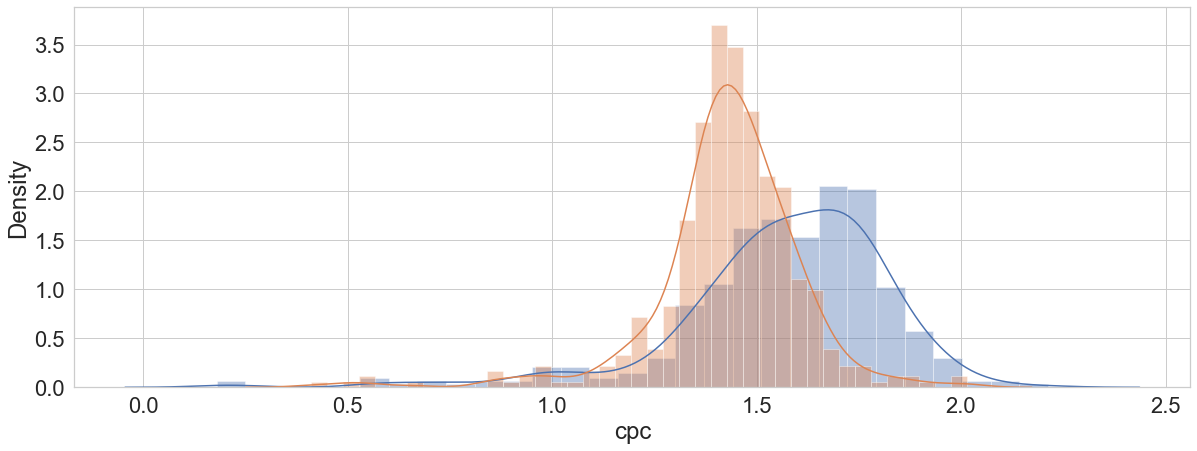

In [13]:
# Let's visualize CPC by gender of users who were shown ads.
sns.distplot(df.query('gender == "M"')['cpc'])
sns.distplot(df.query('gender == "F"')['cpc'])

In [14]:
# Conversion (conversion rate) - the ratio of the number of users
# who have completed the target action at a certain stage
# to the total number of those who have reached this stage.
# Let's calculate the conversion from a click to purchase.
df['conversion_rate'] = round(df['Approved_Conversion'] / df['Clicks'] * 100, 2)
df['conversion_rate']

0       100.00
1         0.00
2          NaN
3         0.00
4       100.00
         ...  
1138      0.79
1139      0.00
1140      0.00
1141      1.48
1142      1.75
Name: conversion_rate, Length: 1143, dtype: float64

In [15]:
df.query('ad_id == 1121814').conversion_rate

860    3.09
Name: conversion_rate, dtype: float64